# Classifing MNIST dataset using LeNet
LeNet is a convolutional neural network structure proposed by Yann LeCun et al. in 1998. In general, LeNet refers to lenet-5 and is a simple convolutional neural network. 

## required modules

In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime

## loading the dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X_train: " + str(X_train.shape))
print("Y_train: " + str(Y_train.shape))
print("X_test: " + str(X_test.shape))
print("Y_test: " + str(Y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


## reshape the dataset

In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("X_train: " + str(X_train.shape))
print("Y_train: " + str(Y_train.shape))
print("X_test: " + str(X_test.shape))
print("Y_test: " + str(Y_test.shape))


X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)


## normalize the datasets

In [4]:
X_train = X_train / 255.0
Y_train = Y_train.astype(np.int32)

X_test = X_test / 255.0
Y_test = Y_test.astype(np.int32)



## one-hot representation of the labels

In [5]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [6]:
def show_sample(X, Y, index):
	image = np.reshape(X[index], (X.shape[1],X.shape[2]))
	labels = Y[index]
	print ("Number: " + str(np.argmax(labels)))
	plt.imshow(image)
	plt.show()

Number: 3


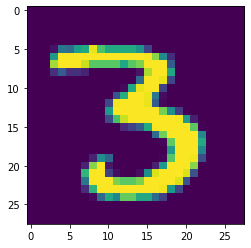

In [7]:
show_sample(X_train, Y_train, 12)

## prepare input features
The LeNet architecture accepts a 32x32 pixel images as input, mnist data is 28x28 pixels. We simply pad the images with zeros to overcome that.

In [8]:
# Pad images with 0s
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape: {}".format(X_train.shape))

Updated Image Shape: (60000, 32, 32, 1)


Number: 3


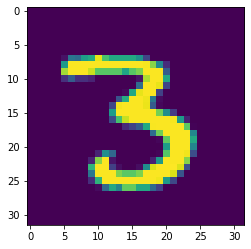

In [9]:
show_sample(X_train, Y_train, 12)

## create the model

In [10]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## train the model

In [12]:
EPOCHS = 5
BATCH_SIZE = 128

history = model.fit(
    X_train,
    Y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1, 
    validation_split=0.2
    )

Epoch 1/5
375/375 [==============================] - 52s 138ms/step - loss: 0.4217 - accuracy: 0.8757 - val_loss: 0.1339 - val_accuracy: 0.9619
Epoch 2/5
375/375 [==============================] - 44s 118ms/step - loss: 0.1200 - accuracy: 0.9634 - val_loss: 0.0904 - val_accuracy: 0.9752
Epoch 3/5
375/375 [==============================] - 31s 83ms/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.0746 - val_accuracy: 0.9770
Epoch 4/5
375/375 [==============================] - 24s 65ms/step - loss: 0.0679 - accuracy: 0.9791 - val_loss: 0.0646 - val_accuracy: 0.9801
Epoch 5/5
375/375 [==============================] - 25s 66ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0588 - val_accuracy: 0.9812


## create history dataframe

In [13]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.421671,0.875687,0.133911,0.961917,0
1,0.119981,0.963375,0.090382,0.975167,1
2,0.083985,0.974354,0.074550,0.977000,2
3,0.067885,0.979146,0.064585,0.980083,3
4,0.056918,0.982458,0.058807,0.981250,4


## plot

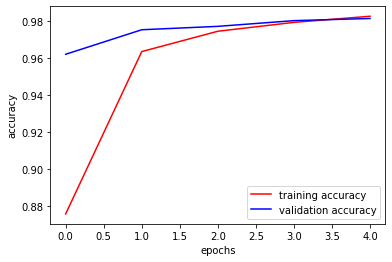

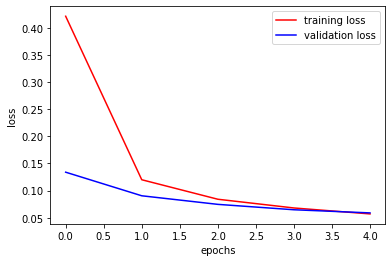

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## evaluate the model on test data

In [15]:
print(model.evaluate(X_test,Y_test))

313/313 [==============================] - 2s 8ms/step - loss: 0.0515 - accuracy: 0.9832
[0.051508281379938126, 0.9832000136375427]


## make a preditcion

In [16]:
prediction = model.predict(X_test)
print("Actual digits:   ", np.argmax(Y_test[0:10], axis = 1))
print("Predicted digits:", np.argmax(prediction[0:10], axis = 1))

Actual digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 5 9]


Actual image of digits:


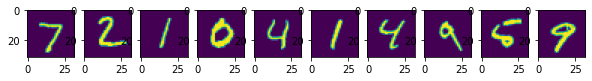

In [17]:
print("Actual image of digits:")
fig, a = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
  a[i].imshow(np.reshape(X_test[i], (32,32)))